# Project 2: Image Stitcher
## Assigned: 02.01.2019
## Due Date: TBD (probably 02.20.2019)

Panoramic photography is ubiquitous, with nearly every digital camera having a mode dedicated to doing it.  Here's an example from the Italian Alps:
<img src="pano.jpg">
Note the extreme aspect ratio: much larger than the 4:3 or 3:2 that is typical of most cameras; suffice to say, the camera that stook this picture did not have a sensor that was this wide.  So how are these things made?  Stated simply, multiple images are taken, mutually identifiable points are located in each of these images, and the images are warped such that these points are coincident.  The matching stage might look like this:
<img src="office.jpeg">

For this project, you will code your own image stitcher from scratch.  Despite the conceptual simplicity of this operation, there are a surprising number of challenges that need to be addressed.  A general framework for a stitcher might look like this:

In [1]:
class Stitcher(object):
    def __init__(self,image_1,image_2):
        self.images = [image_1,image_2]
        
    def find_keypoints(self):
        """
        Step 1: This method locates features that are "good" for matching.  To do this we will implement the Harris 
        corner detector
        """
        
    def generate_descriptors(self):
        """
        Step 2: After identifying relevant keypoints, we need to come up with a quantitative description of the 
        neighborhood of that keypoint, so that we can match it to keypoints in other images.
        """
        
    def match_keypoints(self):
        """
        Step 3: Compare keypoint descriptions between images, identify potential matches, and filter likely
        mismatches
        """
        
    def find_homography(self):
        """
        Step 4: Find a linear transformation (of various complexities) that maps pixels from the second image to 
        pixels in the first image
        """
        
    def stitch(self):
        """
        Step 5: Transform second image into local coordinate system of first image, and (perhaps) perform blending
        to avoid obvious seams between images.
        """

We will populate these functions over the next several weeks, a process that will involve delving into some of the most elementary operations in digital signal processing.  

As a test case, apply your stitcher to at least four overlapping images that you've taken.  With a stitcher that works on two images, more images can be added by applying the method recursively.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def convolve(g,h):
        result = np.zeros_like(g)
        u = g.shape[0]
        v = g.shape[1]
        offset = int((h.shape[0]-1)/2)

        for x in range(offset,u-offset):
            for y in range(offset,v-offset):
                im_temp = g[x-offset:x+offset+1, y-offset:y+offset+1]
                im_tempsum = np.sum(im_temp*h)
                result[x, y] = im_tempsum

        return result

# Gaussian Blur kernel
def gaussian(sigma, size):
    n = 1+2*size
    h = np.zeros((n, n))

    for j in range(-size, size+1):
        for k in range(-size, size+1):
            h[j+size,k+size] = np.exp(-1 * (np.power(j,2) + np.power(k,2)) / (2 * np.power(sigma,2)))

    # Calculate Unity constant
    Z = 1/np.sum(h)
    h = Z * h

    return h

# Sobel Operator kernel (u), for Edge Detection
def sobelu():
    return np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])

# Sobel Operator kernel (v), for Edge Detection
def sobelv():
    return np.array([[-1, -2, -1],
                  [ 0,  0,  0],
                  [ 1,  2,  1]])

#Generate Harris Matrix
def harris(img):
    gauss = gaussian(7,2)
    su = sobelu()
    sv = sobelv()
    gradientu = convolve(img, su)
    gradientv = convolve(img, sv)
    Iuu = convolve(gradientu * gradientu, gauss)
    Ivv = convolve(gradientv * gradientv, gauss)
    Iuv = convolve(gradientu * gradientv, gauss)
    H = (Iuu * Ivv - Iuv * Iuv) / (Iuu + Ivv + 0.0001) 
    return H

# Check if a given pixel is a local maxima
def check_if_local_maxima(H, size, width, height, u, v):
    # test pixel Harris score
    px = H[u,v]
    # iterate over neighborhood
    for j in range(u-size, u+size+1):
        for k in range(v-size, v+size+1):
            if j<0 or k<0 or j>height-1 or k>width-1:
                continue
            # skip itself
            if j==u and k==v:
                continue
            # if pixel of greater score found, not maxima
            elif px < H[j,k]:
                return False
    # else, is maxima
    return True


im = plt.imread('class_photo1re.jpg')

H = harris(im)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(im, cmap='gray')
ax[1].imshow(H)
plt.show()


# Find local maxima of Harris matrix scores
height, width = H.shape
max = []
# size of neighborhood
size = 50

# iterate over pixels
for u in range(height):
    for v in range(width):
        # add to list if local maxima
        if check_if_local_maxima(H, size, width, height, u, v):
            max.append([u,v])

for i in range(len(max)):
    plt.scatter(x=max[i][1], y=max[i][0], c='r')

plt.imshow(I,cmap=plt.cm.gray)
plt.show()

ValueError: operands could not be broadcast together with shapes (5,5,3) (5,5) 

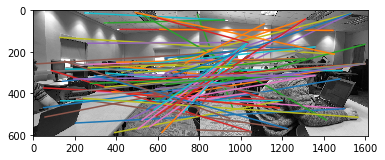